<a href="https://colab.research.google.com/github/danling-northwestern/stat303-2project/blob/main/Assignment_C_050623_progress!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

3. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

4. The assignment is worth 100 points, and is due on **Sunday, 7th May 2023 at 11:59 pm**. 

5. **Five points are properly formatting the assignment**. The breakdown is as follows:
- Must be an HTML file rendered using Quarto (2 pts). *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file. If your issue doesn't seem genuine, you will lose points.* 
- There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) (1 pt)
- Final answers of each question are written in Markdown cells (1 pt).
- There is no piece of unnecessary / redundant code, and no unnecessary / redundant text (1 pt)

## Regression Problem - Miami housing
### Data preparation
Read the data *miami-housing.csv*. Check the description of the variables [here](https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset). Split the data into 60% train and 40% test. Use `random_state = 45`. The response is `SALE_PRC`, and the rest of the columns are predictors, except `PARCELNO`. Print the shape of the predictors dataframe of the train data.

*(2 points)*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

# visulize the trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import pydotplus

In [2]:
miami_house = pd.read_csv('miami-housing.csv')
X = miami_house.drop(columns = ['PARCELNO','SALE_PRC'])
y = miami_house.SALE_PRC
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state = 45)

In [3]:
print(X_train.shape)

(8359, 15)


### Decision tree
Develop a decision tree model to predict `SALE_PRC` based on all the predictors. Use `random_state = 45`. Use the default hyperparameter values. What is the MAE (mean absolute error) on test data?

*(3 points)*

In [4]:
reg_tree = DecisionTreeRegressor(random_state = 45)
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)
print('The MAE of this decision tree is', mean_absolute_error(y_test, y_pred))

The MAE of this decision tree is 68628.19020276332


### Tuning decision tree

Tune the hyperparameters of the decision tree model developed in the previous question, and compute the MAE on test data. You must tune in the following manner:

1. Use `GridSearchCV` to minimize the $5$-fold mean absolute error (MAE). 

2. Use must do a coarse grid search first to get an idea of the domain space where the optimal hyperparameter values lie.

3. You must follow it up with a finer grid search to get more precise optimal hyperparameter values.

4. You may decide yourself which hyperparameters you wish to tune. Common sense should help. There is no single correct answer. 

The MAE must be less than $66,000. You must show the optimal values of the hyperparameters obtained, and the test MAE.

*(3 points for coarse grid search,
3 points for finer grid search,
4 points for reaching the required MAE)*

In [ ]:
# a coarse grid search
params = {'max_depth': np.arange(2,20,2),
          'max_leaf_nodes':np.arange(2,2002,50),
          'min_samples_split': np.arange(2,22,5),
          'min_samples_leaf': np.arange(1,22,5)}
reg_tree_coarse = DecisionTreeRegressor(random_state = 45)
coarse_grid = GridSearchCV(reg_tree_coarse, param_grid = params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
coarse_grid.fit(X_train, y_train)
coarse_grid.best_estimator_

DecisionTreeRegressor(max_depth=16, max_leaf_nodes=602, min_samples_leaf=6,
                      random_state=45)

In [ ]:
# this is the best parameters from the coarse grid search
coarse_grid.best_params_

{'max_depth': 16,
 'max_leaf_nodes': 602,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [ ]:
# a refined grid search
refined_params = {'max_depth': np.arange(14,19,1),
          'max_leaf_nodes':np.arange(553,652,1),
          'min_samples_split': np.arange(1,4,1),
          'min_samples_leaf': np.arange(3,8,1)}
reg_tree_refined = DecisionTreeRegressor(random_state = 45)
refined_grid = GridSearchCV(reg_tree_refined, param_grid = refined_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
refined_grid.fit(X_train, y_train)
# this is the parameter for the refined grid search
refined_grid.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12375 fits failed out of a total of 37125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12375 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _va

{'max_depth': 15,
 'max_leaf_nodes': 647,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [ ]:
# the MAE on the train dataset
print('The average cross-validated MAE is',"${:.2f}".format(-refined_grid.best_score_))

The average cross-validated MAE is $64739.21


In [ ]:
refined_reg_tree = refined_grid.best_estimator_
y_pred1 = refined_reg_tree.predict(X_test)
print('The MAE of the refined decision tree is', "${:.2f}".format(mean_absolute_error(y_test, y_pred1)))

The MAE of the refined decision tree is $64646.10


### Bagging decision trees

Bag decision trees, and compute the MAE on test data. Use enough number of trees, such that the MAE stabilizes. Other than `n_estimators`, use default values of hyperparameters.

The test MAE must be less than $50,000.

*(4 points)*

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
#Finding model accuracy vs number of trees
oob_rsquared={};test_rsquared={};oob_mae={};test_mae = {}
for i in np.linspace(10,400,40,dtype=int):
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=i, 
                        n_jobs=-1,oob_score=True).fit(X_train, y_train)
    oob_rsquared[i]=model.oob_score_  #Returns the out-of_bag R-squared of the model
    test_rsquared[i]=model.score(X_test,y_test) #Returns the test R-squared of the model
    oob_mae[i]=mean_absolute_error(model.oob_prediction_,y_train)
    test_mae[i]=mean_absolute_error(model.predict(X_test),y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:1253: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


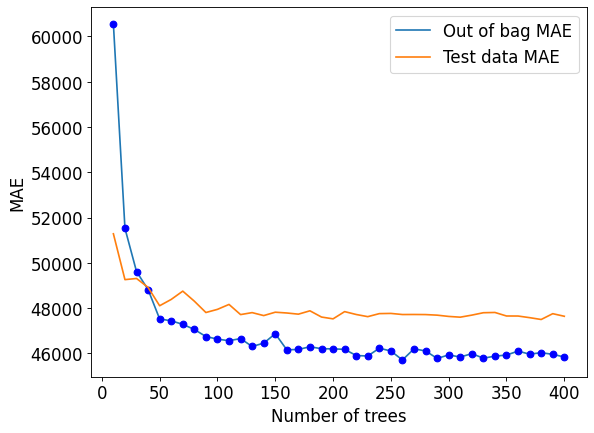

In [ ]:
#Visualizing out-of-bag mae and test data mae
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(oob_mae.keys(),oob_mae.values(),label = 'Out of bag MAE')
plt.plot(oob_mae.keys(),oob_mae.values(),'o',color = 'blue')
plt.plot(test_mae.keys(),test_mae.values(), label = 'Test data MAE')
plt.xlabel('Number of trees')
plt.ylabel('MAE')
plt.legend()

According to the graph above, `n_estimator` will be set as 150.


In [ ]:
bagged_tree = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=150, n_jobs=-1,oob_score=True).fit(X_train, y_train)

In [ ]:
#mae on test data
y_pred2 = bagged_tree.predict(X_test)
print('The MAE of the bagged decision tree is', "${:.2f}".format(mean_absolute_error(y_test, y_pred2)))


The MAE of the bagged decision tree is $47956.88


### Bagging without bootstrapping

Bag decision trees without bootstrapping, i.e., put `bootstrap = False` while bagging the trees, and compute the MAE on test data. Why is the MAE obtained much higher than that in the previous question, but lower than that obtained in [C.1.2](https://nustat.github.io/STAT303-3-class-notes/Assignment%20C.html#decision-tree)?

*(1 point for code, (3 + 3) points for reasoning)*

In [ ]:
bagged_tree_2 = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=150, n_jobs=-1,bootstrap = False).fit(X_train, y_train)

In [ ]:
#mae on test data
y_pred3 = bagged_tree_2.predict(X_test)
print('The MAE of the bagged decision tree without boostrapping is', "${:.2f}".format(mean_absolute_error(y_test, y_pred3)))

The MAE of the bagged decision tree without boostrapping is $66448.00


MAE is much higher than that in the previous question because the models are trianed on the same sample of dataset multiple times. This may lead to overfitting. However, it still performs better (i.e. less MAE) than the tree model without bagging. That is because bagging trains the model with different `random_state` multiple times (150 times in this case) and outputs an average prediction while the decision tree in C.1.2 is trained only once. The variance of bagging without bootstrapping is lower than not using bagging.

### Tuning bagged tree model
#### Approaches

There are two approaches for tuning a bagged tree model:

1. Out of bag predicition

2. $K$-fold cross validation using `GridSearchCV`.

What is the advantage of each approach over the other, i.e., what is the advantage of the out-of-bag approach over $K$-fold cross validation, and what is the advantage of $K$-fold cross validation over the out-of-bag approach?

*(3 + 3 points)*

Advantage of OOB: <br>
1) easier to implement and faster to compute; <br>
2) a model is tested on out-of-bag sample through oob score every time when it is trained. This additional metrics may help fit the model. <br>
Advantage of $K$-fold cross validatiom:<br>
1) the fold can be stratified so that the model less likely to be affected by unbalanced data; <br>
2) Using sklearn `GridSearchCV`, multiple hyperparameters can be tuned to improve the fit. <br>

#### Tuning the hyperparameters

Tune the hyperparameters of the bagged tree model developed in [C.1.4](https://nustat.github.io/STAT303-3-class-notes/Assignment%20C.html#bagging-decision-trees). You may use either of the approaches mentioned in the previous question. Show the optimal values of the hyperparameters obtained. Compute the MAE on test data with the tuned model. Your MAE on test data must be less than $46,000. However, you **cannot use the test data to tune the hyperparameters**.

It is up to you to pick the hyperparameters and their values in the grid.

*(10 points)*

In [ ]:
bagging_params = {'max_samples': np.arange(0.7,1.01,0.1),
                  'max_features':np.arange(0.7,1.01,0.1),
                  'oob_score': [True,False],
                  'n_estimators':[200,500,800]}
bt = BaggingRegressor(estimator =DecisionTreeRegressor(random_state = 45),  random_state = 0)
bagging_grid = GridSearchCV(bt, param_grid = bagging_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
bagging_grid.fit(X_train, y_train)
# this is the parameter for the bagging grid search
bagging_grid.best_params_

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_features': 0.7999999999999999,
 'max_samples': 0.9999999999999999,
 'n_estimators': 800,
 'oob_score': True}

In [ ]:
best_bag_tree = bagging_grid.best_estimator_
y_pred4 = best_bag_tree.predict(X_test)
print('The MAE of the tuned bagging decision tree on the test dataset is', "${:.2f}".format(mean_absolute_error(y_test, y_pred4)))

The MAE of the tuned bagging decision tree on the test dataset is $45970.80


### Bagging feature importance
Arrange and print the predictors in decreasing order of importance.

*(4 points)*

In [ ]:
for i in range(0,800):
  cln_sel = best_bag_tree.estimators_features_[i]
  feature_sel = X_train.columns[cln_sel]
  tree = best_bag_tree.estimators_[i]
  importance = tree.feature_importances_ 
  locals()['importance_table{0}'.format(i)] = pd.DataFrame(data = [feature_sel,importance], index = ['feature','importance'+str(i)]).T

In [ ]:
importance_table0

,feature,importance0
0,HWY_DIST,0.025981
1,CNTR_DIST,0.050909
2,SPEC_FEAT_VAL,0.157083
3,SUBCNTR_DI,0.071977
4,RAIL_DIST,0.038484
5,WATER_DIST,0.046286
6,month_sold,0.011169
7,LONGITUDE,0.050852
8,OCEAN_DIST,0.260235
9,structure_quality,0.231848


In [ ]:
importance_table = importance_table0
for i in range(1,800):
  importance_table = importance_table.merge(locals()['importance_table{0}'.format(i)], how = 'outer', on ='feature')

In [ ]:
importance_table.set_index('feature', inplace=True)

In [ ]:
importance_table.mean(axis = 1).sort_values(ascending = False)

feature
TOT_LVG_AREA         0.433172
OCEAN_DIST           0.184840
CNTR_DIST            0.136535
structure_quality    0.112411
LONGITUDE            0.098901
SUBCNTR_DI           0.072591
SPEC_FEAT_VAL        0.072511
LND_SQFOOT           0.049863
WATER_DIST           0.049761
LATITUDE             0.039557
age                  0.036865
HWY_DIST             0.027719
RAIL_DIST            0.026272
month_sold           0.007509
avno60plus           0.000338
dtype: float64

### Random forest

#### Tuning random forest
Tune a random forest model to predict `SALE_PRC`, and compute the MAE on test data. The MAE must be less than $46,000.

It is up to you to pick the hyperparameters and their values in the grid.

*(10 points)*

For the sake of runtime, I will tune hyperparameters other than `n_estimators` first. 

In [5]:
from sklearn.ensemble import RandomForestRegressor
skf_reg = StratifiedKFold(n_splits=5)

In [76]:
rf_params = {'max_depth': [28,29,30,31,32],
             'max_features': ['sqrt', 0.5,1.0],
             'oob_score':[True, False],
             'min_impurity_decrease':[0,0.13, 0.14, 0.15, 0.16, 0.17, 0.2],
             'criterion': ['squared_error', 'absolute_error'],# 'friedman_mse','poisson'],
             'min_weight_fraction_leaf': [0, 0.01, 0.02, 0.005],
             #'ccp_alpha': [0, 0.01, 0.05, 0.1]
             #'min_samples_split':[2,4,6,8],
             #'min_samples_leaf': [1,3,5,10,15],
             #'max_leaf_nodes': [50,100,500, None]
             }
rf = RandomForestRegressor(random_state = 16, n_jobs = -1, n_estimators = 50)
rf_grid = GridSearchCV(rf, param_grid = rf_params,  scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [10]:
rf_grid.best_params_

{'ccp_alpha': 0,
 'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 0.5,
 'min_impurity_decrease': 0.15,
 'min_weight_fraction_leaf': 0,
 'oob_score': True}

In [73]:
rf_reg = RandomForestRegressor(random_state = 16, max_depth = 30, max_features = 0.5, min_impurity_decrease = 0.17, oob_score = True,
                               min_weight_fraction_leaf = 0,criterion = 'squared_error', n_estimators=1200,n_jobs=-1)

In [74]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=0.5,
                      min_impurity_decrease=0.17, min_weight_fraction_leaf=0,
                      n_estimators=1200, n_jobs=-1, oob_score=True,
                      random_state=16)

In [75]:
y_pred_try = rf_reg.predict(X_test)
print('The MAE of the tuned random forest on the test dataset is', "${:.2f}".format(mean_absolute_error(y_test, y_pred_try)))

The MAE of the tuned random forest on the test dataset is $46527.13


#### Feature importance
Arrange and print the predictors in decreasing order of importance.

*(4 points)*

In [ ]:
for i in range(0,800):
  feature_sel = best_rf.feature_names_in_
  rf_tree = best_rf.estimators_[i]
  importance = rf_tree.feature_importances_ 
  locals()['rf_importance_table{0}'.format(i)] = pd.DataFrame(data = [feature_sel,importance], index = ['feature','importance'+str(i)]).T

In [ ]:
rf_importance_table = rf_importance_table0
for i in range(1,800):
  rf_importance_table = rf_importance_table.merge(locals()['rf_importance_table{0}'.format(i)], how = 'outer', on ='feature')

In [ ]:
rf_importance_table.set_index('feature', inplace=True)

In [ ]:
rf_importance_table.mean(axis = 1).sort_values(ascending = False)

feature
TOT_LVG_AREA         0.308953
OCEAN_DIST           0.149118
structure_quality    0.105510
CNTR_DIST            0.077871
SPEC_FEAT_VAL        0.076137
LONGITUDE            0.065811
SUBCNTR_DI           0.061608
LND_SQFOOT           0.035445
WATER_DIST           0.030799
LATITUDE             0.029611
age                  0.019989
HWY_DIST             0.017033
RAIL_DIST            0.016987
month_sold           0.004952
avno60plus           0.000176
dtype: float64

#### Random forest vs bagging: `max_features` 

Note that the `max_features` hyperparameter is there both in the `RandomForestRegressor()` function and the `BaggingRegressor()` function. Does it have the same meaning in both the functions? If not, then what is the difference?

**Hint:** Check scikit-learn documentation

*(1 + 3 points)*

They do not mean the same thing. In `BaggingRegressor()` it means the number of features to draw from X to train each estimator. In random `RandomForestRegressor()`, it means the number of features to consider when splitting the data.

## Classification - Term deposit

The data for this question is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls, where bank clients were called to subscribe for a term deposit. 

There is a train data - *train.csv*, which you will use to develop a model. There is a test data - *test.csv*, which you will use to test your model. Each dataset has the following attributes about the clients called in the marketing campaign:

1. `age`: Age of the client

2. `education`: Education level of the client 

3. `day`: Day of the month the call is made

4. `month`: Month of the call 

5. `y`: did the client subscribe to a term deposit? 

6. `duration`: Call duration, in seconds. This attribute highly affects the output target (e.g., if `duration`=0 then `y`='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call `y` is obviously known. Thus, this input should only be included for inference purposes and should be discarded if the intention is to have a realistic predictive model.

(Raw data source: [Source](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Do not use the raw data source for this assignment. It is just for reference.)

### Data preparation
Convert all the categorical predictors in the data to dummy variables. Note that `month` and `education` are categorical variables.

*(2 points)*

In [77]:
train_cl = pd.read_csv('train.csv')
test_cl = pd.read_csv('test.csv')

In [78]:
X_train_cl = train_cl.drop(columns = ['duration','y'])
y_train_cl = train_cl['y']
X_test_cl = test_cl.drop(columns = ['duration','y'])
y_test_cl = test_cl['y']

In [79]:
X_train_cl = pd.get_dummies(X_train_cl, drop_first = True)
X_test_cl = pd.get_dummies(X_test_cl, drop_first = True)
y_test_cl = pd.get_dummies(y_test_cl, drop_first = True)
y_train_cl = pd.get_dummies(y_train_cl, drop_first = True)

### Decision tree
Develop and tune a **decision tree model** to predict the probability of a client subscribing to a term deposit based on `age`, `education`, `day` and `month`. The model must have: 

(a)  **Minimum overall classification accuracy of 70%** among the classifcation accuracies on *train.csv*, and *test.csv*. 

(b) **Minimum recall of 60%** among the recall on *train.csv*, and *test.csv*. 

Print the accuracy and recall for both the datasets - *train.csv*, and *test.csv*.

Note that: 

i. You cannot use `duration` as a predictor. The predictor is not useful for prediction because its value is determined after the marketing call ends. However, after the call ends, we already know whether the client responded positively or negatively. 

ii. You are free to choose any value of threshold probability for classifying observations. However, you must use the same threshold on both the datasets.

iii. Use cross-validation on train data to optimize the model hyperparameters.

iv. Using the optimal model hyperparameters obtained in (iii), develop the decision tree model. Plot the 5-fold cross-validated accuracy and recall against decision threshold probability. Tune the decision threshold probability based on the plot, or the data underlying the plot to achieve the required trade-off between recall and accuracy.

v. Evaluate the accuracy and recall of the developed model with the tuned decision threshold probability on both the datasets. Note that the test dataset must only be used to evaluate performance metrics, and not optimize any hyperparameters or decision threshold probability.

*(14 points - 4 points for tuning the hyperparameters, 4 points for making the plot, 4 points for tuning the decision threshold probability based on the plot, and 2 points for printing the accuracy & recall on both the datasets)*

**Hint:** Restrict the search for `max_depth` to a maximum of 25, and `max_leaf_nodes` to a maximum of 50. Without this restriction, you may get a better recall for threshold probability = 0.5, but are likely to get a worse trade-off between recall and accuracy.

It is up to you to pick the hyperparameters and their values in the grid.

In [80]:
tree_cl_params = {'criterion':['gini','entropy'],
                  'max_depth':[9,10,11,12,15,17,22],
                  'max_leaf_nodes':[24,25,28,45,36,13,42],
                  'max_features':['sqrt', 'log2', 0.5, None],
                  #'class_weight':['balanced', None],
                  #'ccp_alpha':np.arange(0,0.2,0.02),
                  #'splitter': ['best', 'random'],
                  #'min_samples_split':[2,5,10,50,100],
                  'min_samples_leaf': [45,46,47,48,49,50],
                  #'min_weight_fraction_leaf':[0.0, 0.1, 0.5],
                  #'min_impurity_decrease': [0.0, 0.05, 0.1]
                  }

In [81]:
skf = StratifiedKFold(n_splits=5)

In [82]:
dec_tree = DecisionTreeClassifier(random_state = 45)
dec_tree_grid = GridSearchCV(dec_tree, param_grid = tree_cl_params, scoring = ['accuracy','recall'], refit = 'accuracy', cv=skf, n_jobs=-1)
dec_tree_grid.fit(X_train_cl, y_train_cl.yes)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=45), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 10, 11, 12, 15, 17, 22],
                         'max_features': ['sqrt', 'log2', 0.5, None],
                         'max_leaf_nodes': [24, 25, 28, 45, 36, 13, 42],
                         'min_samples_leaf': [45, 46, 47, 48, 49, 50]},
             refit='accuracy', scoring=['accuracy', 'recall'])

In [83]:
best_tree_cl = dec_tree_grid.best_estimator_

In [84]:
cross_val_ypred = pd.DataFrame(cross_val_predict(best_tree_cl, X_train_cl, y_train_cl.yes, cv = skf, method = 'predict_proba'))
cross_val_ypred = cross_val_ypred.loc[:,1]

In [85]:
counter = 0
thres_table = pd.DataFrame(columns =['threshold','accuracy','recall'])
for thres in np.arange(0,0.2,0.002):
  y_fit = (cross_val_ypred > thres).astype('int')
  accuracy = accuracy_score(y_train_cl, y_fit)
  recall = recall_score(y_train_cl, y_fit)
  thres_table.loc[counter, 'threshold'] = thres
  thres_table.loc[counter, 'accuracy'] = accuracy
  thres_table.loc[counter, 'recall'] = recall
  counter = counter +1
# now I got a table with all thres and 5-fold accuracy and recall

In [86]:
def plot_accuracy_recall_vs_threshold(thres_table):
    sns.set_style("whitegrid")
    accuracy = thres_table.accuracy
    recall = thres_table.recall
    threshold = thres_table.threshold
    plt.figure(figsize=(8, 8))
    plt.title("Accuracy and Recall Scores as a function of the decision threshold")
    plt.plot(threshold, accuracy, "b--", label="accuracy")
    plt.plot(threshold, recall, "g-", label="recall")
    plt.plot(threshold, accuracy, "o", color = 'blue')
    plt.plot(threshold, recall, "o", color = 'green')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.xticks(np.arange(0,0.2,0.01))
    plt.yticks(np.arange(0,1.01,0.1))
    plt.legend()

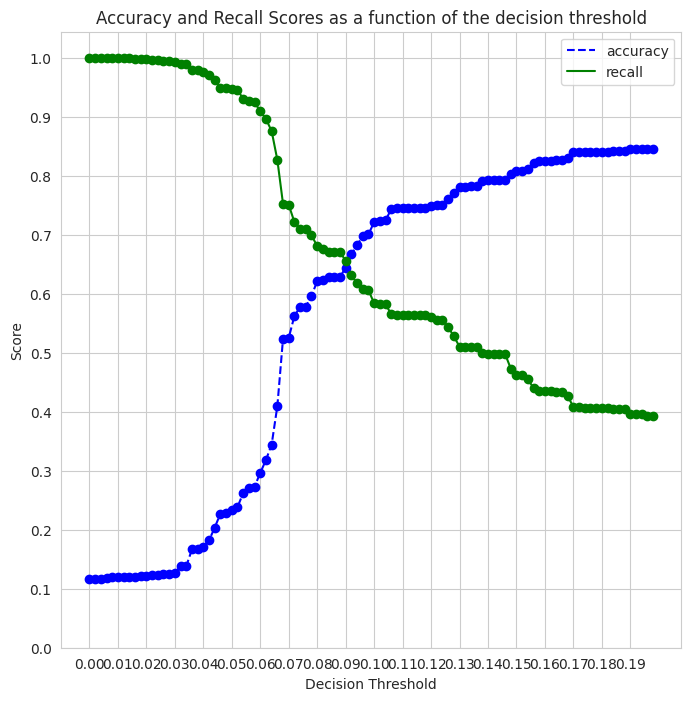

In [87]:
plot_accuracy_recall_vs_threshold(thres_table)

proposed threshold: 0.095.

In [88]:
# predict y_train
y_train_pred = pd.DataFrame(best_tree_cl.predict_proba(X_train_cl))[1] 
y_train_pred = (y_train_pred > 0.095).astype('int')
print('the accuracy of the training data is', accuracy_score(y_train_cl,y_train_pred))
print('the recall of the training data is', recall_score(y_train_cl,y_train_pred))

the accuracy of the training data is 0.7046857142857142
the recall of the training data is 0.6301169590643275


In [89]:
# predict y_test
y_test_pred = pd.DataFrame(best_tree_cl.predict_proba(X_test_cl))[1] 
y_test_pred = (y_test_pred > 0.095).astype('int')
print('the accuracy of the testing data is', accuracy_score(y_test_cl,y_test_pred))
print('the recall of the testing data is', recall_score(y_test_cl,y_test_pred))

the accuracy of the testing data is 0.7039718254744668
the recall of the testing data is 0.642495784148398


### Random forest
Develop and tune a **random forest model** to predict the probability of a client subscribing to a term deposit based on `age`, `education`, `day` and `month`. The model must have: 

(a)  **Minimum overall classification accuracy of 75%** among the classifcation accuracies on *train.csv*, and *test.csv*. 

(b) **Minimum recall of 60%** among the recall on *train.csv*, and *test.csv*. 

Print the accuracy and recall for both the datasets - *train.csv*, and *test.csv*.

Note that: 

i. You cannot use `duration` as a predictor. The predictor is not useful for prediction because its value is determined after the marketing call ends. However, after the call ends, we already know whether the client responded positively or negatively. 

ii. You are free to choose any value of threshold probability for classifying observations. However, you must use the same threshold on both the datasets.

iii. Use cross-validation on train data to optimize the model hyperparameters.

iv. Using the optimal model hyperparameters obtained in (iii), develop the decision tree model. Plot the cross-validated accuracy and recall against decision threshold probability. Tune the decision threshold probability based on the plot, or the data underlying the plot to achieve the required trade-off between recall and accuracy.

v. Evaluate the accuracy and recall of the developed model with the tuned decision threshold probability on both the datasets. Note that the test dataset must only be used to evaluate performance metrics, and not optimize any hyperparameters or decision threshold probability.

*(12 points - 4 points for tuning the hyperparameters, 3 points for making the plot, 3 points for tuning the decision threshold probability based on the plot, and 2 points for printing the accuracy & recall on both the datasets)*

**Hint:** Restrict the search for `max_depth` to a maximum of 25, and `max_leaf_nodes` to a maximum of 45. Without this restriction, you may get a better recall for threshold probability = 0.5, but are likely to get a worse trade-off between recall and accuracy.

It is up to you to pick the hyperparameters and their values in the grid.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_cl_params = {'criterion':['gini','entropy','log_loss'],
                  'max_depth':[6,7,8,9,10],
                  'max_leaf_nodes':[22,23,24,25,26,27,28],
                  'max_features':['sqrt', 'log2', 0.5, None],
                  #'class_weight':['balanced', None],
                  'ccp_alpha':np.arange(0,0.2,0.02),
                  #'splitter': ['best', 'random'],
                  'min_sample_split':[2,5,10,50,100],
                  'min_sample_leaf': [1,5,10,50,100],
                  'min_weight_fraction_leaf':[0.0, 0.1, 0.5],
                  'min_impurity_decrease': [0.0, 0.05, 0.1],
                  'oob_score':[True, False],
                  'max_samples': [0.5, 0.7, None]
                  }

## Predictor transformations in trees
Can a non-linear monotonic transformation of predictors (such as *log(), sqrt()* etc.) be useful in improving the accuracy of decision tree models?

*(3 points for answer)*